# Process scRNA Data

### Load Required Packages

In [1]:
suppressMessages(library(tidyverse))
suppressMessages(library(data.table))

### Load Data

In [2]:
raw_cluster_markers <- readRDS("data/cluster_markers.rds")

In [3]:
raw_cluster_markers

p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
0.000000e+00,0.4494532,0.990,0.983,0.000000e+00,01_Epiblast,TUBA1B
0.000000e+00,0.4127053,0.964,0.956,0.000000e+00,01_Epiblast,RAN
0.000000e+00,0.4096168,0.991,0.988,0.000000e+00,01_Epiblast,HMGB1
0.000000e+00,0.3973166,0.986,0.980,0.000000e+00,01_Epiblast,MIF
0.000000e+00,0.3694416,0.999,0.997,0.000000e+00,01_Epiblast,PTMA
1.695114e-299,0.3594874,0.990,0.986,6.204287e-295,01_Epiblast,NPM1
1.274326e-294,0.6858786,0.917,0.841,4.664161e-290,01_Epiblast,TUBB2B
1.761001e-291,0.4153007,0.988,0.974,6.445438e-287,01_Epiblast,TUBB
1.321185e-290,0.5244911,0.977,0.956,4.835671e-286,01_Epiblast,TUBA1A


In [4]:
table(raw_cluster_markers$cluster)


         01_Epiblast 02_Non_neuroectoderm         03_Epidermal 
                 530                  774                  849 
          04_Placode      05_Neural_crest     06_Neuroectoderm 
                 600                  359                  248 
    07_Telencephalon      08_Diencephalon     09_Mesencephalon 
                 232                  874                  242 
       10_Rhombomere        11_Roof_plate 
                 730                  565 

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
0.000e+00 0.000e+00 0.000e+00 9.739e-05 0.000e+00 9.714e-03 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  2.013  14.204  31.510     Inf  63.656     Inf 

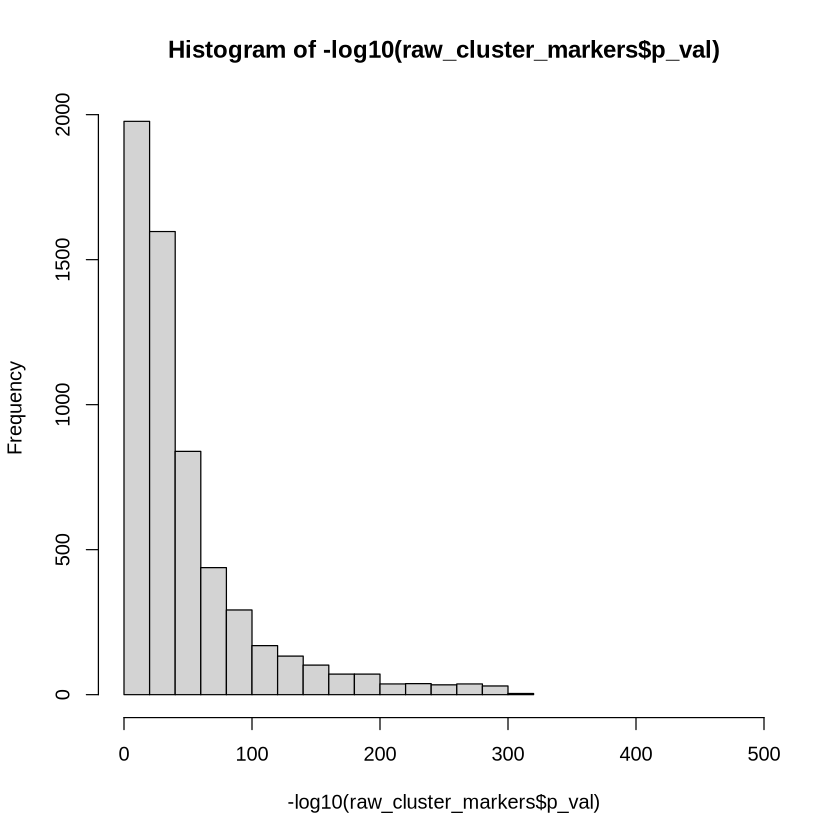

In [5]:
summary(raw_cluster_markers$p_val)
summary(-log10(raw_cluster_markers$p_val))
hist(-log10(raw_cluster_markers$p_val), xlim = c(0,500))

### Transform Table

In [6]:
# get -log10 of p-value
# convert p=0 to 1e-350 to avoid Inf
cluster_markers_all <- raw_cluster_markers %>% select("p_val", "cluster", "gene")
cluster_markers_all$score <- cluster_markers_all$p_val
cluster_markers_all$score <- -log10(cluster_markers_all$score)
cluster_markers_all$score <- ifelse(cluster_markers_all$score == Inf , 350, cluster_markers_all$score)
cluster_markers_all <- cluster_markers_all %>% select(-p_val)

   Mode   FALSE 
logical    6003 

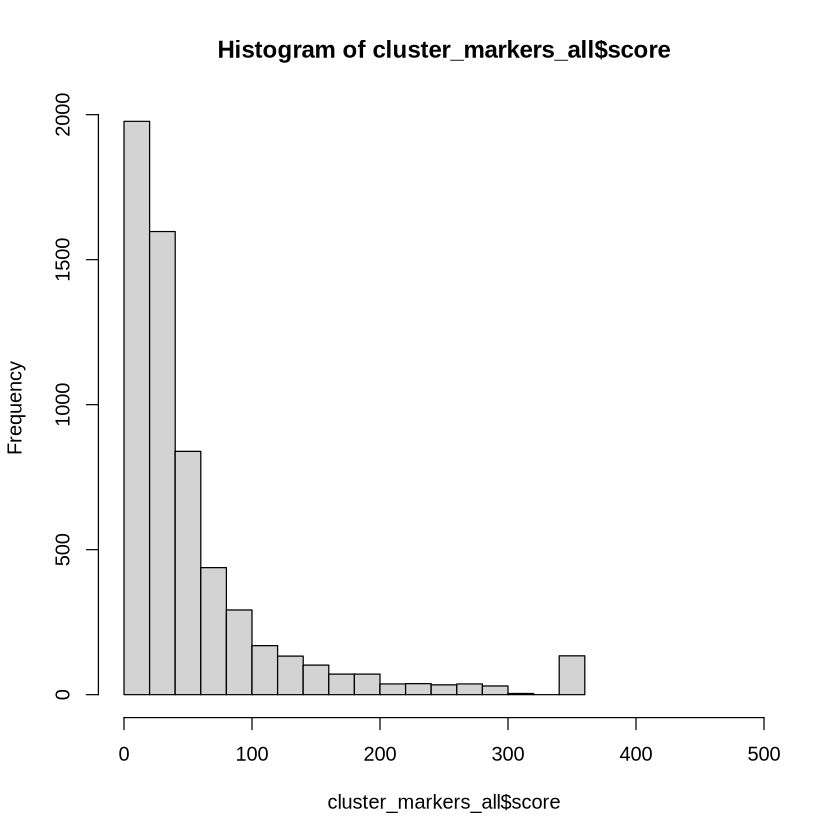

In [7]:
summary(cluster_markers_all$score > 350)
hist(cluster_markers_all$score, xlim = c(0,500))

In [8]:
cluster_markers_all

cluster,gene,score
<fct>,<chr>,<dbl>
01_Epiblast,TUBA1B,350.0000
01_Epiblast,RAN,350.0000
01_Epiblast,HMGB1,350.0000
01_Epiblast,MIF,350.0000
01_Epiblast,PTMA,350.0000
01_Epiblast,NPM1,298.7708
01_Epiblast,TUBB2B,293.8947
01_Epiblast,TUBB,290.7542
01_Epiblast,TUBA1A,289.8790


### Break into subtables by cluster identity 

In [9]:
table(cluster_markers_all$cluster)


         01_Epiblast 02_Non_neuroectoderm         03_Epidermal 
                 530                  774                  849 
          04_Placode      05_Neural_crest     06_Neuroectoderm 
                 600                  359                  248 
    07_Telencephalon      08_Diencephalon     09_Mesencephalon 
                 232                  874                  242 
       10_Rhombomere        11_Roof_plate 
                 730                  565 

In [10]:
cluster_markers_epiblast <- cluster_markers_all %>% filter(cluster == "01_Epiblast")
cluster_markers_non_neuroectoderm <- cluster_markers_all %>% filter(cluster == "02_Non_neuroectoderm")
cluster_markers_epidermal <- cluster_markers_all %>% filter(cluster == "03_Epidermal")
cluster_markers_placode <- cluster_markers_all %>% filter(cluster == "04_Placode")
cluster_markers_neural_crest <- cluster_markers_all %>% filter(cluster == "05_Neural_crest")
cluster_markers_neuroectoderm <- cluster_markers_all %>% filter(cluster == "06_Neuroectoderm")
cluster_markers_telencephalon <- cluster_markers_all %>% filter(cluster == "07_Telencephalon")
cluster_markers_diencephalon <- cluster_markers_all %>% filter(cluster == "08_Diencephalon")
cluster_markers_mesencephalon <- cluster_markers_all %>% filter(cluster == "09_Mesencephalon")
cluster_markers_rhombomere <- cluster_markers_all %>% filter(cluster == "10_Rhombomere")
cluster_markers_roof_plate <- cluster_markers_all %>% filter(cluster == "11_Roof_plate")

In [11]:
nrow(cluster_markers_epiblast)
nrow(cluster_markers_non_neuroectoderm)
nrow(cluster_markers_epidermal)
nrow(cluster_markers_placode)
nrow(cluster_markers_neural_crest)
nrow(cluster_markers_neuroectoderm)
nrow(cluster_markers_telencephalon)
nrow(cluster_markers_diencephalon)
nrow(cluster_markers_mesencephalon)
nrow(cluster_markers_rhombomere)
nrow(cluster_markers_roof_plate)

[1] 530

[1] 774

[1] 849

[1] 600

[1] 359

[1] 248

[1] 232

[1] 874

[1] 242

[1] 730

[1] 565

In [12]:
head(cluster_markers_epiblast)

cluster,gene,score
<fct>,<chr>,<dbl>
01_Epiblast,TUBA1B,350.0000
01_Epiblast,RAN,350.0000
01_Epiblast,HMGB1,350.0000
01_Epiblast,MIF,350.0000
01_Epiblast,PTMA,350.0000
01_Epiblast,NPM1,298.7708


## Get genome coordinate from UCSC table browser

UCSC table browser: https://genome.ucsc.edu/cgi-bin/hgTables

In [14]:
# read table browser output
tablebrowser_refsep_epiblast <- fread(file = "data/tablebrowser_refseq_epiblast.bed")
tablebrowser_refsep_non_neuroectoderm <- fread(file = "data/tablebrowser_refseq_non_neuroectoderm.bed")
tablebrowser_refsep_epidermal <- fread(file = "data/tablebrowser_refseq_epidermal.bed")
tablebrowser_refsep_placode <- fread(file = "data/tablebrowser_refseq_placode.bed")
tablebrowser_refsep_neural_crest <- fread(file = "data/tablebrowser_refseq_neural_crest.bed")
tablebrowser_refsep_neuroectoderm <- fread(file = "data/tablebrowser_refseq_neuroectoderm.bed")
tablebrowser_refsep_telencephalon <- fread(file = "data/tablebrowser_refseq_telencephalon.bed")
tablebrowser_refsep_diencephalon <- fread(file = "data/tablebrowser_refseq_diencephalon.bed")
tablebrowser_refsep_mesencephalon <- fread(file = "data/tablebrowser_refseq_mesencephalon.bed")
tablebrowser_refsep_rhombomere <- fread(file = "data/tablebrowser_refseq_rhombomere.bed")
tablebrowser_refsep_roof_plate <- fread(file = "data/tablebrowser_refseq_roof_plate.bed")

In [15]:
head(tablebrowser_refsep_epiblast)

#bin,name,chrom,strand,txStart,txEnd,cdsStart,cdsEnd,exonCount,exonStarts,exonEnds,score,name2,cdsStartStat,cdsEndStat,exonFrames
<int>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>
802,NM_014280.3,chr1,-,28526788,28559540,28527758,28559509,9,"28526788,28530257,28531768,28534852,28536482,28537081,28541450,28555432,28559431,","28527881,28530333,28531860,28534924,28536577,28537148,28541507,28555534,28559540,",0,DNAJC8,cmpl,cmpl,"0,2,0,0,1,0,0,0,0,"
1776,NM_001199653.2,chr1,+,156182797,156209833,156182806,156209378,5,"156182797,156202110,156203418,156206139,156209338,","156182967,156202216,156203519,156206274,156209833,",0,PMF1,cmpl,cmpl,"0,2,0,2,2,"
1776,NM_001199654.2,chr1,+,156182797,156209833,156182806,156209392,5,"156182797,156195347,156203418,156206078,156209338,","156182967,156195459,156203519,156206274,156209833,",0,PMF1,cmpl,cmpl,"0,2,0,2,0,"
233,NR_026550.3,chr1,-,167885912,167905234,167905234,167905234,5,"167885912,167889216,167889784,167893734,167904970,","167887597,167889328,167889869,167893775,167905234,",0,MPC2,none,none,"-1,-1,-1,-1,-1,"
1780,NM_001199723.2,chr1,-,156669397,156675576,156669817,156675238,5,"156669397,156670333,156670665,156675168,156675500,","156669868,156670450,156670844,156675338,156675576,",0,CRABP2,cmpl,cmpl,"0,0,1,0,-1,"
1757,NM_004515.4,chr1,-,153634263,153643469,153634871,153643398,14,"153634263,153635180,153635494,153635690,153636518,153636871,153637695,153638138,153640030,153640475,153640928,153642311,153642646,153643393,","153635032,153635271,153635609,153635752,153636606,153636950,153637812,153638204,153640133,153640553,153641033,153642354,153642706,153643469,",0,ILF2,cmpl,cmpl,"1,0,2,0,2,1,1,1,0,0,0,2,2,0,"


In [16]:
#function for removing prefix
rename.chr <- function(raw_bed) {
    raw_bed$chr <- gsub("chr10.*", "10", raw_bed$chr)
    raw_bed$chr <- gsub("chr11.*", "11", raw_bed$chr)
    raw_bed$chr <- gsub("chr12.*", "12", raw_bed$chr)
    raw_bed$chr <- gsub("chr13.*", "13", raw_bed$chr)
    raw_bed$chr <- gsub("chr14.*", "14", raw_bed$chr)
    raw_bed$chr <- gsub("chr15.*", "15", raw_bed$chr)
    raw_bed$chr <- gsub("chr16.*", "16", raw_bed$chr)
    raw_bed$chr <- gsub("chr17.*", "17", raw_bed$chr)
    raw_bed$chr <- gsub("chr18.*", "18", raw_bed$chr)
    raw_bed$chr <- gsub("chr19.*", "19", raw_bed$chr)
    raw_bed$chr <- gsub("chr20.*", "20", raw_bed$chr)
    raw_bed$chr <- gsub("chr21.*", "21", raw_bed$chr)
    raw_bed$chr <- gsub("chr22.*", "22", raw_bed$chr)
    raw_bed$chr <- gsub("chrX.*", "X", raw_bed$chr)
    raw_bed$chr <- gsub("chrY.*", "Y", raw_bed$chr)
    raw_bed$chr <- gsub("chr1.*", "1", raw_bed$chr)
    raw_bed$chr <- gsub("chr2.*", "2", raw_bed$chr)
    raw_bed$chr <- gsub("chr3.*", "3", raw_bed$chr)
    raw_bed$chr <- gsub("chr4.*", "4", raw_bed$chr)
    raw_bed$chr <- gsub("chr5.*", "5", raw_bed$chr)
    raw_bed$chr <- gsub("chr6.*", "6", raw_bed$chr)
    raw_bed$chr <- gsub("chr7.*", "7", raw_bed$chr)
    raw_bed$chr <- gsub("chr8.*", "8", raw_bed$chr)
    raw_bed$chr <- gsub("chr9.*", "9", raw_bed$chr)

    return(raw_bed)
    }

In [17]:
coordination_epiblast <- tablebrowser_refsep_epiblast %>% select("name2", "chrom", "txStart", "txEnd") %>% rename("gene" = "name2", "chr" = "chrom", "start" = "txStart", "end" = "txEnd") %>% distinct(gene, .keep_all = TRUE)
epiblast <- rename.chr(merge(cluster_markers_epiblast, coordination_epiblast, by = "gene")[,c("chr","start","end","gene","score")])

coordination_non_neuroectoderm <- tablebrowser_refsep_non_neuroectoderm %>% select("name2", "chrom", "txStart", "txEnd") %>% rename("gene" = "name2", "chr" = "chrom", "start" = "txStart", "end" = "txEnd") %>% distinct(gene, .keep_all = TRUE)
non_neuroectoderm <- rename.chr(merge(cluster_markers_non_neuroectoderm, coordination_non_neuroectoderm, by = "gene")[,c("chr","start","end","gene","score")])

coordination_epidermal <- tablebrowser_refsep_epidermal %>% select("name2", "chrom", "txStart", "txEnd") %>% rename("gene" = "name2", "chr" = "chrom", "start" = "txStart", "end" = "txEnd") %>% distinct(gene, .keep_all = TRUE)
epidermal <- rename.chr(merge(cluster_markers_epidermal, coordination_epidermal, by = "gene")[,c("chr","start","end","gene","score")])

coordination_placode <- tablebrowser_refsep_placode %>% select("name2", "chrom", "txStart", "txEnd") %>% rename("gene" = "name2", "chr" = "chrom", "start" = "txStart", "end" = "txEnd") %>% distinct(gene, .keep_all = TRUE)
placode <- rename.chr(merge(cluster_markers_placode, coordination_placode, by = "gene")[,c("chr","start","end","gene","score")])

coordination_neural_crest <- tablebrowser_refsep_neural_crest %>% select("name2", "chrom", "txStart", "txEnd") %>% rename("gene" = "name2", "chr" = "chrom", "start" = "txStart", "end" = "txEnd") %>% distinct(gene, .keep_all = TRUE)
neural_crest <- rename.chr(merge(cluster_markers_neural_crest, coordination_neural_crest, by = "gene")[,c("chr","start","end","gene","score")])

coordination_neuroectoderm <- tablebrowser_refsep_neuroectoderm %>% select("name2", "chrom", "txStart", "txEnd") %>% rename("gene" = "name2", "chr" = "chrom", "start" = "txStart", "end" = "txEnd") %>% distinct(gene, .keep_all = TRUE)
neuroectoderm <- rename.chr(merge(cluster_markers_neuroectoderm, coordination_neuroectoderm, by = "gene")[,c("chr","start","end","gene","score")])

coordination_telencephalon <- tablebrowser_refsep_telencephalon %>% select("name2", "chrom", "txStart", "txEnd") %>% rename("gene" = "name2", "chr" = "chrom", "start" = "txStart", "end" = "txEnd") %>% distinct(gene, .keep_all = TRUE)
telencephalon <- rename.chr(merge(cluster_markers_telencephalon, coordination_telencephalon, by = "gene")[,c("chr","start","end","gene","score")])

coordination_diencephalon <- tablebrowser_refsep_diencephalon %>% select("name2", "chrom", "txStart", "txEnd") %>% rename("gene" = "name2", "chr" = "chrom", "start" = "txStart", "end" = "txEnd") %>% distinct(gene, .keep_all = TRUE)
diencephalon <- rename.chr(merge(cluster_markers_diencephalon, coordination_diencephalon, by = "gene")[,c("chr","start","end","gene","score")])

coordination_mesencephalon <- tablebrowser_refsep_mesencephalon %>% select("name2", "chrom", "txStart", "txEnd") %>% rename("gene" = "name2", "chr" = "chrom", "start" = "txStart", "end" = "txEnd") %>% distinct(gene, .keep_all = TRUE)
mesencephalon <- rename.chr(merge(cluster_markers_mesencephalon, coordination_mesencephalon, by = "gene")[,c("chr","start","end","gene","score")])

coordination_rhombomere <- tablebrowser_refsep_rhombomere %>% select("name2", "chrom", "txStart", "txEnd") %>% rename("gene" = "name2", "chr" = "chrom", "start" = "txStart", "end" = "txEnd") %>% distinct(gene, .keep_all = TRUE)
rhombomere <- rename.chr(merge(cluster_markers_rhombomere, coordination_rhombomere, by = "gene")[,c("chr","start","end","gene","score")])

coordination_roof_plate <- tablebrowser_refsep_roof_plate %>% select("name2", "chrom", "txStart", "txEnd") %>% rename("gene" = "name2", "chr" = "chrom", "start" = "txStart", "end" = "txEnd") %>% distinct(gene, .keep_all = TRUE)
roof_plate <- rename.chr(merge(cluster_markers_roof_plate, coordination_roof_plate, by = "gene")[,c("chr","start","end","gene","score")])


In [18]:
nrow(epiblast)
head(epiblast)
nrow(cluster_markers_epiblast)

nrow(non_neuroectoderm)
head(non_neuroectoderm)
nrow(cluster_markers_non_neuroectoderm)

nrow(epidermal)
head(epidermal)
nrow(cluster_markers_epidermal)

nrow(placode)
head(placode)
nrow(cluster_markers_placode)

nrow(neural_crest)
head(neural_crest)
nrow(cluster_markers_neural_crest)

nrow(neuroectoderm)
head(neuroectoderm)
nrow(cluster_markers_neuroectoderm)

nrow(telencephalon)
head(telencephalon)
nrow(cluster_markers_telencephalon)

nrow(diencephalon)
head(diencephalon)
nrow(cluster_markers_diencephalon)

nrow(mesencephalon)
head(mesencephalon)
nrow(cluster_markers_mesencephalon)

nrow(rhombomere)
head(rhombomere)
nrow(cluster_markers_rhombomere)

nrow(roof_plate)
head(roof_plate)
nrow(cluster_markers_roof_plate)


[1] 507

,chr,start,end,gene,score
,<chr>,<int>,<int>,<chr>,<dbl>
1,6,160183076,160200144,ACAT2,56.20178
2,7,5566778,5570232,ACTB,208.56085
3,17,79476996,79479825,ACTG1,199.65499
4,1,46016497,46035721,AKR1A1,14.78881
5,1,21835915,21904903,ALPL,8.15999
6,17,79848665,79858409,ANAPC11,62.28017


[1] 530

[1] 751

,chr,start,end,gene,score
,<chr>,<int>,<int>,<chr>,<dbl>
1,9,107543286,107690436,ABCA1,17.776743
2,16,16043472,16236910,ABCC1,5.751622
3,18,19230861,19284735,ABHD3,15.998175
4,9,133710640,133763062,ABL1,10.140688
5,17,35441926,35656692,ACACA,9.333452
6,2,223725753,223809357,ACSL3,9.743008


[1] 774

[1] 827

,chr,start,end,gene,score
,<chr>,<int>,<int>,<chr>,<dbl>
1,4,89011415,89152778,ABCG2,131.21989
2,20,25275378,25371471,ABHD12,32.35617
3,6,139349881,139364439,ABRACL,29.79278
4,2,237478467,237490997,ACKR3,55.90337
5,17,48503578,48552198,ACSF2,79.49724
6,16,20775335,20797636,ACSM3,85.81002


[1] 849

[1] 584

,chr,start,end,gene,score
,<chr>,<int>,<int>,<chr>,<dbl>
1,1,94883944,94944279,ABCD3,57.68309
2,10,116190868,116392156,ABLIM1,27.93733
3,12,81471857,81654989,ACSS3,48.87096
4,2,158592957,158731511,ACVR1,36.57884
5,2,148602597,148688391,ACVR2A,70.46217
6,8,24151581,24216527,ADAM28,350.00000


[1] 600

[1] 352

,chr,start,end,gene,score
,<chr>,<int>,<int>,<chr>,<dbl>
1,9,74477367,74526109,ABHD17B,20.33319
2,18,19230861,19284735,ABHD3,55.82179
3,3,52017550,52023213,ACY1,39.83239
4,10,127700959,128077046,ADAM12,178.90174
5,2,207308255,207485851,ADAM23,118.23638
6,2,3501136,3521518,ADI1,42.47318


[1] 359

[1] 230

,chr,start,end,gene,score
,<chr>,<int>,<int>,<chr>,<dbl>
1,9,107543286,107690436,ABCA1,15.075651
2,5,64444564,64777747,ADAMTS6,7.955761
3,2,70883915,70995332,ADD2,10.827242
4,4,62066043,62944053,ADGRL3,37.912741
5,5,89854613,90460254,ADGRV1,18.088179
6,4,87928422,88062191,AFF1,23.289594


[1] 248

[1] 221

,chr,start,end,gene,score
,<chr>,<int>,<int>,<chr>,<dbl>
1,3,64501329,64673676,ADAMTS9,17.54769
2,19,14258554,14316981,ADGRL1,14.16870
3,4,62066043,62944053,ADGRL3,29.56662
4,11,10326619,10328944,ADM,41.71094
5,7,129007981,129070052,AHCYL2,44.69791
6,12,112204736,112255336,ALDH2,24.39604


[1] 232

[1] 832

,chr,start,end,gene,score
,<chr>,<int>,<int>,<chr>,<dbl>
1,13,95672088,95953705,ABCC4,56.82049
2,17,35441926,35656692,ACACA,63.14469
3,3,132276984,132378653,ACAD11,34.42996
4,6,160183076,160200144,ACAT2,35.28218
5,2,237478467,237490997,ACKR3,79.97674
6,2,223725753,223809357,ACSL3,34.46428


[1] 874

[1] 234

,chr,start,end,gene,score
,<chr>,<int>,<int>,<chr>,<dbl>
1,X,108884563,108976486,ACSL4,10.37149
2,12,43747668,43946006,ADAMTS20,42.60325
3,10,1223252,1779719,ADARB2,15.03423
4,6,69345173,70099398,ADGRB3,14.28422
5,5,89854613,90460254,ADGRV1,25.50499
6,1,48998525,50489626,AGBL4,32.46441


[1] 242

[1] 701

,chr,start,end,gene,score
,<chr>,<int>,<int>,<chr>,<dbl>
1,2,219128851,219134860,AAMP,7.513153
2,9,107543286,107690436,ABCA1,7.802456
3,6,139349881,139364439,ABRACL,3.582219
4,2,264946,272481,ACP1,5.030182
5,2,98272401,98280507,ACTR1B,6.479010
6,2,70883915,70994847,ADD2,2.484760


[1] 730

[1] 538

,chr,start,end,gene,score
,<chr>,<int>,<int>,<chr>,<dbl>
1,2,158592957,158731511,ACVR1,25.21975
2,4,73146685,73434938,ADAMTS3,53.38557
3,3,64501329,64673676,ADAMTS9,25.42371
4,3,64670545,64997143,ADAMTS9-AS2,39.15918
5,9,18474150,18910948,ADAMTSL1,57.38808
6,21,46494492,46646478,ADARB1,10.98324


[1] 565

### Prepare file for bedtools intersect

In [19]:
# assign score to +-400kb from genes
epiblast_400kb <- epiblast
epiblast_400kb$start <- epiblast$start - 400000
epiblast_400kb$end <- epiblast$end + 400000
epiblast_400kb[epiblast_400kb$start < 0, "start"] <- 0

non_neuroectoderm_400kb <- non_neuroectoderm
non_neuroectoderm_400kb$start <- non_neuroectoderm$start - 400000
non_neuroectoderm_400kb$end <- non_neuroectoderm$end + 400000
non_neuroectoderm_400kb[non_neuroectoderm_400kb$start < 0, "start"] <- 0

epidermal_400kb <- epidermal
epidermal_400kb$start <- epidermal$start - 400000
epidermal_400kb$end <- epidermal$end + 400000
epidermal_400kb[epidermal_400kb$start < 0, "start"] <- 0

placode_400kb <- placode
placode_400kb$start <- placode$start - 400000
placode_400kb$end <- placode$end + 400000
placode_400kb[placode_400kb$start < 0, "start"] <- 0

neural_crest_400kb <- neural_crest
neural_crest_400kb$start <- neural_crest$start - 400000
neural_crest_400kb$end <- neural_crest$end + 400000
neural_crest_400kb[neural_crest_400kb$start < 0, "start"] <- 0

neuroectoderm_400kb <- neuroectoderm
neuroectoderm_400kb$start <- neuroectoderm$start - 400000
neuroectoderm_400kb$end <- neuroectoderm$end + 400000
neuroectoderm_400kb[neuroectoderm_400kb$start < 0, "start"] <- 0

telencephalon_400kb <- telencephalon
telencephalon_400kb$start <- telencephalon$start - 400000
telencephalon_400kb$end <- telencephalon$end + 400000
telencephalon_400kb[telencephalon_400kb$start < 0, "start"] <- 0

diencephalon_400kb <- diencephalon
diencephalon_400kb$start <- diencephalon$start - 400000
diencephalon_400kb$end <- diencephalon$end + 400000
diencephalon_400kb[diencephalon_400kb$start < 0, "start"] <- 0

mesencephalon_400kb <- mesencephalon
mesencephalon_400kb$start <- mesencephalon$start - 400000
mesencephalon_400kb$end <- mesencephalon$end + 400000
mesencephalon_400kb[mesencephalon_400kb$start < 0, "start"] <- 0

rhombomere_400kb <- rhombomere
rhombomere_400kb$start <- rhombomere$start - 400000
rhombomere_400kb$end <- rhombomere$end + 400000
rhombomere_400kb[rhombomere_400kb$start < 0, "start"] <- 0

roof_plate_400kb <- roof_plate
roof_plate_400kb$start <- roof_plate$start - 400000
roof_plate_400kb$end <- roof_plate$end + 400000
roof_plate_400kb[roof_plate_400kb$start < 0, "start"] <- 0

In [20]:
write.table(epiblast_400kb, file = "data/epiblast_400kb.bed", sep = "\t", row.names = FALSE, col.names = FALSE, quote = FALSE)
write.table(non_neuroectoderm_400kb, file = "data/non_neuroectoderm_400kb.bed", sep = "\t", row.names = FALSE, col.names = FALSE, quote = FALSE)
write.table(epidermal_400kb, file = "data/epidermal_400kb.bed", sep = "\t", row.names = FALSE, col.names = FALSE, quote = FALSE)
write.table(placode_400kb, file = "data/placode_400kb.bed", sep = "\t", row.names = FALSE, col.names = FALSE, quote = FALSE)
write.table(neural_crest_400kb, file = "data/neural_crest_400kb.bed", sep = "\t", row.names = FALSE, col.names = FALSE, quote = FALSE)
write.table(neuroectoderm_400kb, file = "data/neuroectoderm_400kb.bed", sep = "\t", row.names = FALSE, col.names = FALSE, quote = FALSE)
write.table(telencephalon_400kb, file = "data/telencephalon_400kb.bed", sep = "\t", row.names = FALSE, col.names = FALSE, quote = FALSE)
write.table(diencephalon_400kb, file = "data/diencephalon_400kb.bed", sep = "\t", row.names = FALSE, col.names = FALSE, quote = FALSE)
write.table(mesencephalon_400kb, file = "data/mesencephalon_400kb.bed", sep = "\t", row.names = FALSE, col.names = FALSE, quote = FALSE)
write.table(rhombomere_400kb, file = "data/rhombomere_400kb.bed", sep = "\t", row.names = FALSE, col.names = FALSE, quote = FALSE)
write.table(roof_plate_400kb, file = "data/roof_plate_400kb.bed", sep = "\t", row.names = FALSE, col.names = FALSE, quote = FALSE)